#  ¿Cómo se mueve un péndulo? 

> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

Referencias: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html

**En realidad esto es el estudio de oscilaciones. **
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Andromeda_Galaxy_560mm_FL.jpg" width="400px" height="100px" />
 </div>

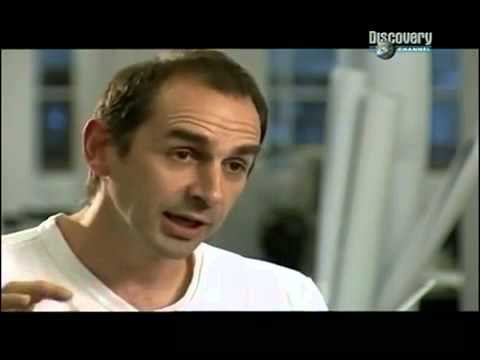

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema ` masa-resorte` y el `péndulo simple`. 

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="150px" height="50px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="200px" height="100px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

___
## Sistema `masa-resorte`

La solución a este sistema `masa-resorte` se explica en términos de la segunda ley de Newton. Para este caso, si la masa permanece constante y solo consideramos la dirección en $x$. Entonces,
\begin{equation}
F = m \frac{d^2x}{dt^2}.
\end{equation}

¿Cuál es la fuerza? **Ley de Hooke!**
\begin{equation}
F = -k x, \quad k > 0.
\end{equation}

Vemos que la fuerza se opone al desplazamiento y su intensidad es proporcional al mismo.  Y $k$ es la constante elástica o recuperadora del resorte. 

Entonces, un modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
\frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

<font color=red> Ver en el tablero que significa solución de la ecuación diferencial.</font>

### **¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

_Esta instrucción es para que las gráficas aparezcan dentro de este entorno._

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Podemos cambiar qué tan grandes son los números de los ejes
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size

In [4]:
import numpy as np

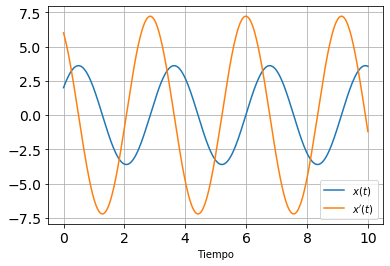

In [9]:
# Definición de funciones a graficar
t = np.linspace(0, 10, 1000)
A, B = 2, 3
w0 = 2
x = A * np.cos(w0 * t) + B * np.sin(w0 * t)
dx = w0 * (-A * np.sin(w0 * t) + B * np.cos(w0 * t))
# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(t, x, label="$x(t)$")
plt.plot(t, dx, label="$x'(t)$")
plt.xlabel("Tiempo")
plt.grid()
plt.legend()

Y si consideramos un conjunto de frecuencias de oscilación, entonces 

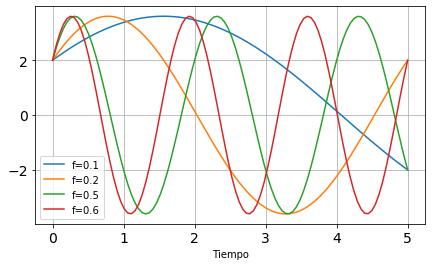

In [11]:
frecuencias = np.array([.1, .2 , .5, .6])   # Vector de diferentes frecuencias
plt.figure(figsize = (7, 4))                # Ventana de gráfica con tamaño

# Graficamos para cada frecuencia
t = np.linspace(0, 5, 100)
for f in frecuencias:
    w0 = 2 * np.pi * f
    x = A * np.cos(w0 * t) + B * np.sin(w0 * t)
    plt.plot(t, x, label=f"f={f}")
    
plt.xlabel("Tiempo")
plt.grid()
plt.legend()

Si queremos manipular un poco mas las cosas, hacemos uso de lo siguiente:

In [12]:
from ipywidgets import *

In [13]:
def masa_resorte(t=0):
    A, B, w0 = .5, .1, .5                            # Parámetros
    x = A * np.cos(w0 * t) + B * np.sin(w0 * t)      # Función de posición
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, [0],  'ko', ms = 10)
    ax.set_xlim(xmin = -0.6, xmax = .6)
    ax.axvline(x=0, color = 'r')
    ax.axhline(y=0, color = 'grey', lw = 1)
    fig.canvas.draw()

In [14]:
interact(masa_resorte, t=(0, 50,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=50.0, step=0.01), Output()), _dom_classes=('…

La opción de arriba generalmente será lenta, así que lo recomendable es usar `interact_manual`. 

In [15]:
interact_manual(masa_resorte, t=(0, 50,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=50.0, step=0.01), Button(description='Run In…

___
## Péndulo simple
Ahora, si fijamos nuestra atención al movimiento de un péndulo simple _(oscilaciones pequeñas)_, la ecuación diferencial a resolver tiene la misma forma:

\begin{equation}
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta = 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l}.
\end{equation}

La diferencia más evidente es como hemos definido a $\omega_{0}$. Esto quiere decir que, 

\begin{equation}
\theta(t) = A\cos(\omega_{0} t) + B\sin(\omega_{0}t)
\end{equation}

Si graficamos la ecuación de arriba vamos a encontrar un comportamiento muy similar al ya discutido anteriormente. Es por ello que ahora veremos el movimiento en el plano $xy$. Es decir, 

\begin{align}
x &= l \sin(\theta), \quad
y = l \cos(\theta) 
\end{align}

In [16]:
# Podemos definir una función que nos entregue theta dados los parámetros y el tiempo
def theta_t(a, b, g, l, t):
    omega_0 = np.sqrt(g / l)
    return a * np.cos(omega_0 * t) + b * np.sin(omega_0 * t) 

In [25]:
# Hacemos un gráfico interactivo del péndulo
def pendulo_simple(t=0):
    a, b = .5, .1                            # Parámetros
    g, l = 9.8, 0.5
    theta = theta_t(a, b, g, l, t)      # Función de posición
    x = l * np.sin(theta)
    y = -l * np.cos(theta)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot([0], [0],  'dr', ms=10)
    ax.plot(x, y, 'ok', ms=20)
    ax.plot([0, x], [0, y], 'k')
    ax.axvline(x=0, color='grey')
    ax.set_xlim(xmin=-0.5, xmax=0.5)
    ax.set_ylim(ymin=-0.5, ymax=0.05)
    fig.canvas.draw()

In [26]:
interact_manual(pendulo_simple, t=(0, 10,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Button(description='Run In…

### Condiciones iniciales 

Realmente lo que se tiene que resolver es, 

\begin{equation}
\theta(t) = \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)
\end{equation}

> **Actividad.** Modificar el programa anterior para incorporar las condiciones iniciales. 

In [27]:
# Solución: 
def theta_t(theta0, dtheta0, g, l, t):
    omega_0 = np.sqrt(g / l)
    return theta0 * np.cos(omega_0 * t) + dtheta0 / w0 * np.sin(omega_0 * t) 

In [28]:
def pendulo_simple(t=0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1, 1, 1)
    l = 2
    g = 9.8
    theta0 = np.pi / 4
    dtheta0 = 0
    x = l * np.sin(theta_t(np.pi / 4, 0, 9.8, 2, t))
    y =  - l * np.cos(theta_t(np.pi / 4, 0, 9.8, 2, t))
    ax.plot(x, y, 'ko', ms = 10)
    ax.plot([0], [0], 'rD')
    ax.plot([0, x ], [0, y], 'k-', lw = 1)
    ax.set_xlim(xmin = -2.2, xmax = 2.2)
    ax.set_ylim(ymin = -2.2, ymax = .2)
    fig.canvas.draw()
    
interact_manual(pendulo_simple, t=(0, 10,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Button(description='Run In…

### Plano fase  $(x, \frac{dx}{dt})$

La posición y velocidad para el sistema `masa-resorte` se escriben como: 

\begin{align}
x(t) &= x(0) \cos(\omega_{o} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{o} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)]
\end{align}

In [29]:
# Parámetros
k = 3  #constante elástica [N]/[m] 
m = 1 # [kg]
omega_0 = np.sqrt(k / m)
x_0 = .5
dx_0 = .1

In [46]:
# Vector de tiempo
t = np.linspace(0, 100, 1000)

In [47]:
# Posición y velocidad
x = x_0 * np.cos(omega_0 * t) + dx_0 / omega_0 * np.sin(omega_0 * t)
dx = -omega_0 * x_0 * np.sin(omega_0 * t) + dx_0 * np.cos(omega_0 * t)

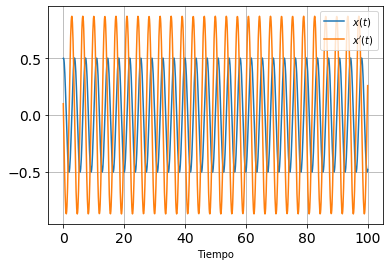

In [48]:
# Gráficas en el tiempo
plt.figure(figsize=(6, 4))
plt.plot(t, x, label="$x(t)$")
plt.plot(t, dx, label="$x'(t)$")
plt.xlabel("Tiempo")
plt.grid()
plt.legend()

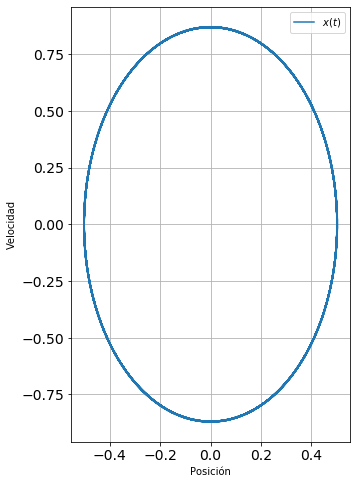

In [50]:
# posición vs. velocidad
# Gráfico
plt.figure(figsize=(5, 8))
plt.plot(x, dx, label="$x(t)$")
plt.xlabel("Posición")
plt.ylabel("Velocidad")
plt.grid()
plt.legend()

#### Multiples condiciones iniciales

In [51]:
k = 3  #constante elástica [N]/[m] 
m = 1 # [kg]
omega_0 = np.sqrt(k/m)

In [52]:
# Condiciones iniciales
x_0s = np.array([.7, .5, .25, .1])
dx_0s = np.array([.2, .1, .05, .01])

In [53]:
# Vector de tiempo
t = np.linspace(0, 100, 1000)

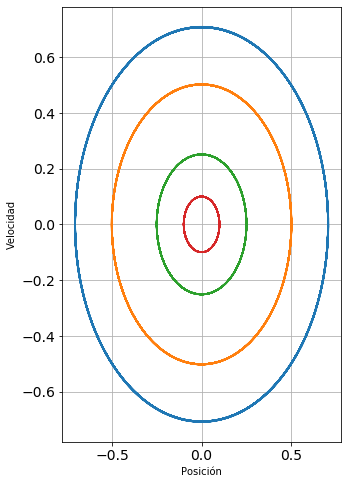

In [61]:
# Gráficas
plt.figure(figsize=(5, 8))
for i, x_0 in enumerate(x_0s):
    x = x_0 * np.cos(omega_0 * t) + dx_0s[i] / omega_0 * np.sin(omega_0 * t)
    dx = -omega_0 * x_0 * np.sin(omega_0 * t) + dx_0s[i] * np.cos(omega_0 * t)
    plt.plot(x, dx / omega_0)

plt.xlabel("Posición")
plt.ylabel("Velocidad")
plt.grid()

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x}\,/\omega_0)$ para diferentes valores de la energía. 

# Anuncios parroquiales

## 1. Quiz la próxima clase

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso. Modified by Esteban Jiménez Rodríguez
</footer>